# Portfolio Project: Biodiversity in National Parks
Code and analysis by Adam Laviguer \<adamlaviguer@gmail.com\>

___
## Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

___
## Scoping

It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.

___
## Import Python Modules

In [24]:
# Import common libraries. All or some of these may be used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import iqr, ttest_ind, pearsonr, trim_mean, chi2_contingency, ttest_1samp, binomtest

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

___
## Load Project Data

To analyze the status of conservation of species and their observations in national parks, load the datasets into `DataFrames`. Once loaded as `DataFrames` the data can be explored and visualized with Python.

In the next steps, `Observations.csv`  and `Species_info.csv` are read in as `DataFrames` called `observations` and `species` respectively. The newly created `DataFrames` are glimpsed with `.head()` to check its contents.

### `species_info.csv`

- **category** - class of animal
- **scientific_name** - the scientific name of each species
- **common_name** - the common names of each species
- **conservation_status** - each species’ current conservation status

In [25]:
species = pd.read_csv('./codecademy-portfolio-project-biodiversity-in-national-parks/species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### `observations.csv`

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [26]:
observations = pd.read_csv('./codecademy-portfolio-project-biodiversity-in-national-parks/observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


### Data Characteristics

Next, there will be a check for the dimensions of the data sets, for `species` there are 5,824 rows and 4 columns while `observations` has 23,296 rows and 3 columns.

In [27]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


### Explore the Data

#### `species`

It is time to explore the `species` data a little more in depth. The first thing is to find the number of distinct species in the data. Use the column `scientific_name` to get 5,541 unique species. There seems to be a lot of species in the national parks!

In [28]:
print(f"number of species: {species.scientific_name.nunique()}")

number of species: 5541


Next is to find the number of `category` that are represented in the data and there are 7 including animals and plants.

In [29]:
print(f"number of categories: {species.category.nunique()}")
print(f"categories: {species.category.unique()}")

number of categories: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Here is a chance to drill one level deeper and see the count of `category` in the data. Vascular plants are by far the largest share of species with 4,470 in the data with reptiles being the fewest with 79.

In [30]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Another column to explore is `conservation_status`. The column has 4 categories, `Species of Concern`, `Endangered`, `Threatened`, `In Recovery`, and  `nan` values. 

In [31]:
print(f"number of conservation statuses:{species.conservation_status.nunique()}")
print(f"unique conservation statuses:{species.conservation_status.unique()}")

number of conservation statuses:4
unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Next a count of the number of observations in the breakdown of the categories in `conservation_status` is done. There are 5,633 `nan` values which means that they are species without concerns. On the other hand there are 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery. 

Note: In most cases coming across `nan` values must be treated carefully, but the absence of data here means that these species are not under any conservation status.

In [32]:
print(f"na values:{species.conservation_status.isna().sum()}")

print(species.groupby("conservation_status").size())

na values:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


#### `observations`

The next section looks at `observations` data. The first task is to check the number of parks that are in the dataset and there are only 4 national parks.

In [33]:
print(f"number of parks: {observations.park_name.nunique()}")
print(f"unique parks: {observations.park_name.unique()}")

number of parks: 4
unique parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Here are the total number of observations logged in the parks, there are 3,314,739 sightings in the last 7 days... that's a lot of observations! 

In [34]:
print(f"number of observations: {observations.observations.sum()}")

number of observations: 3314739


## Analysis

### Cleanup `species` Data

This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [35]:
species.fillna('No Intervention', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

The next thing to do for the `species` data is handle duplicates.

As shown below, there are 557 rows in `species` where the `scientific_name` variable is duplicated. Looking closer at the `common_names` variable for the duplicated rows, we see that the common names are not always consolidated into a single row for each scientific name.

To resolve this, we will use a dictionary to store all the possible common name values for each scientific name, then delete the duplicate rows from the DataFrame. After dropping the duplicates, we can update the common names variable using the dictionary so that each scientific name has all possible common name values on a single row.

In [36]:
print('There are {} rows where the scientific name is duplicated.'.format(species.scientific_name.duplicated(keep=False).sum()))
duplicate_rows = species[species.scientific_name.duplicated(keep=False)].sort_values(['category', 'scientific_name'])
print('\nHere are the first 19 rows with duplicate scientific names:')
duplicate_rows[['scientific_name', 'common_names']].head(19)

There are 557 rows where the scientific name is duplicated.

Here are the first 19 rows with duplicate scientific names:


,scientific_name,common_names
421,Rana catesbeiana,American Bullfrog
3267,Rana catesbeiana,"American Bullfrog, Bullfrog"
167,Alectoris chukar,Chukar
3144,Alectoris chukar,"Chukar, Chukar Partridge"
242,Anthus rubescens,Water Pipit
3194,Anthus rubescens,American Pipit
116,Branta bernicla,Brant
3088,Branta bernicla,"Brant, Brant Goose, Brent Goose"
333,Butorides virescens,Green-Backed Heron
3233,Butorides virescens,Green Heron


In [37]:
def consolidate_common_names(df):
    # Sort the inputted DataFrame so that the function works
    sorted_df = df.sort_values(by=['scientific_name', 'common_names'])
    # Initialize empty list, dictionary and string objects
    common_names_list = []
    common_names_dict = {}
    current_name = None
    for i in range(len(sorted_df)):
        if sorted_df.iloc[i]['scientific_name'] != current_name:
            current_name = sorted_df.iloc[i]['scientific_name']
            common_names_list = [name for name in sorted_df.iloc[i]['common_names'].split(', ')]
        elif sorted_df.iloc[i]['scientific_name'] == current_name:
            for new_name in sorted_df.iloc[i]['common_names'].split(', '):
                if new_name in common_names_list:
                    continue
                else:
                    common_names_list.append(new_name)
        common_names_dict[current_name] = [name for name in common_names_list]
    
    return common_names_dict

# Save the dictionary output by the function into a variable called species_dict
species_dict = consolidate_common_names(species)

# Drop the duplicate rows in place where the scientific name is duplicated.
species.drop_duplicates(inplace=True, subset=['scientific_name'])
# Check for duplicate rows.
print('There are {} rows where the scientific name is duplicated.'.format(species.scientific_name.duplicated(keep=False).sum()))

# Replace the common_name values with the consolidated names from the species_info_dict
for i in range(len(species)):
    sci_name = species.iloc[i]['scientific_name']
    species.at[i, 'common_names'] = ', '.join(species_dict[sci_name])

There are 0 rows where the scientific name is duplicated.


### Cleanup `observations` Data

As shown below, there are 30 rows in the `observations_df` where the entire row is duplicated.

Given the exactness of the duplication, this appears to be a data entry error and we should not include the duplicate rows in the total count. Additionally, these duplicated rows do not appear to correlate to the duplication found in the `species_info_df` DataFrame. Further, there is no time series information in the `observations.csv` dataset, so we cannot reasonably conclude that these observations (with the exact same `observations` values) occurred at different times/dates.

Therefore, we can safely drop the duplicate rows so as not to affect our analysis.

In [38]:
print('There are {} duplicate rows.'.format(observations.duplicated(keep=False).sum()))
duplicate_rows = observations[observations.duplicated(keep=False)].sort_values(['scientific_name', 'park_name', 'observations'])
print('\nHere are all 30 duplicate rows:')
duplicate_rows.head(30)

There are 30 duplicate rows.

Here are all 30 duplicate rows:


,scientific_name,park_name,observations
513,Arctium minus,Yosemite National Park,162
10674,Arctium minus,Yosemite National Park,162
4527,Botrychium virginianum,Yellowstone National Park,232
20294,Botrychium virginianum,Yellowstone National Park,232
14142,Cichorium intybus,Yellowstone National Park,266
19392,Cichorium intybus,Yellowstone National Park,266
1454,Echinochloa crus-galli,Great Smoky Mountains National Park,62
7263,Echinochloa crus-galli,Great Smoky Mountains National Park,62
1020,Eleocharis palustris,Great Smoky Mountains National Park,62
12381,Eleocharis palustris,Great Smoky Mountains National Park,62


In [39]:
# Drop the duplicate rows in place where the whole row is duplicated.
observations.drop_duplicates(inplace=True)
# Check for duplicate rows.
print('There are {} duplicate rows.'.format(observations.duplicated(keep=False).sum()))

There are 0 duplicate rows.


### Combining the Datasets

In [41]:
species_obs = pd.merge(observations, species, on='scientific_name')

### 1. What is the distribution of `conservation_status` for animals?

Next is to checkout the different categories that are nested in the `conservation_status` column except for the ones that do not require an intervention. There is both the table and chart to explore below.

For those in the `Endangered` status, 7 were mammals and 4 were birds. In the `In Recovery` status, there were 3 birds and 1 mammal, which could possibly mean that the birds are bouncing back more than the mammals. 

In [42]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,6.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,NaN,3.0,2.0,NaN,NaN,2.0


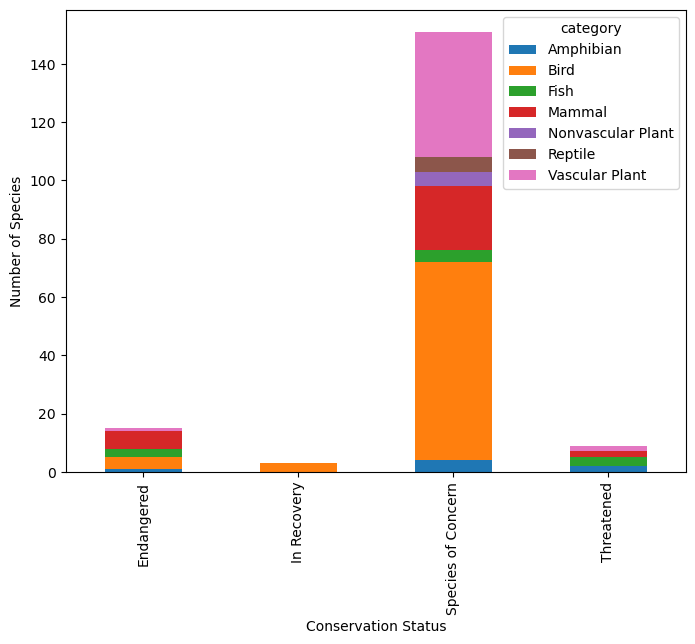

In [43]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

### 2. What is the most diverse national park?

To begin answering this question, we will consider "diversity" to be a measure of unique species which have been observed at each national park.

Given the result below, we see that the `merged_df` dataset contains 4 unique national park values and each national park has the same number of unique scientific names mentioned as observations at that park. Therefore we conclude that every species in our data set has been observed at every national park in our data set. With this conclusion, we cannot say one park is more diverse than another.

In [44]:
print(species_obs.groupby('park_name')['scientific_name'].nunique())

park_name
Bryce National Park                    5541
Great Smoky Mountains National Park    5541
Yellowstone National Park              5541
Yosemite National Park                 5541
Name: scientific_name, dtype: int64


### 3. Which park has the best chance of observing an animal?

First, let's understand if the `category` variable contains data which will let us filter the observations for those just for animals.

Given the result below, we can see that there are values for `Bird`, `Mammal`, `Fish`, `Amphibian`, and `Reptile`. For this particular analysis, we will filter the DataFrame to only include results for these `category` values and will exclude any results for `Plant` values.

In [45]:
print(species_obs.category.value_counts())

category
Vascular Plant       17867
Bird                  2083
Nonvascular Plant     1332
Mammal                 855
Fish                   508
Amphibian              320
Reptile                316
Name: count, dtype: int64


To make this analysis easier to repeat, let's add a column called `sub_category` which denotes whether the row is for an `Animal` or a `Plant`.

In [46]:
species_obs['sub_category'] = species_obs['category'].apply(lambda x: 'Animal' if x in ['Bird', 'Mammal', 'Fish', 'Amphibian', 'Reptile'] else 'Plant')
print(species_obs.sub_category.value_counts())

sub_category
Plant     19199
Animal     4082
Name: count, dtype: int64


Given the result below, we can safely conclude that Yellowstone National Park presents the greatest chance of observing an animal.

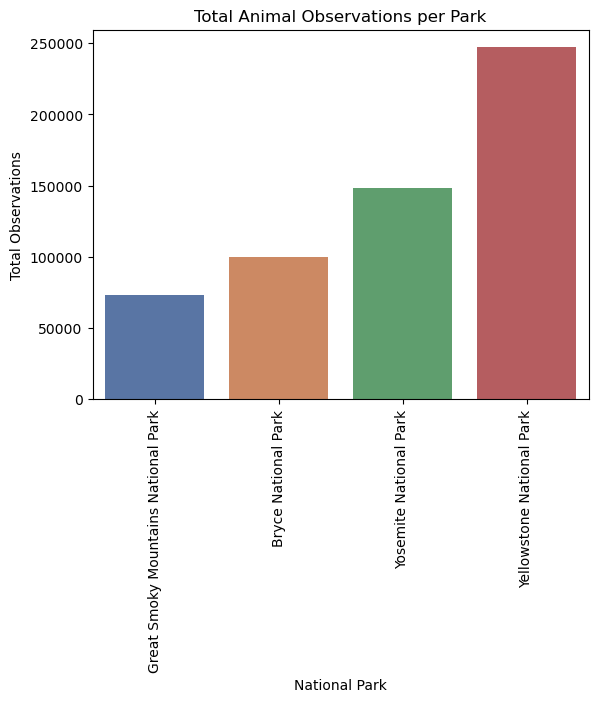

,park_name,observations
0,Great Smoky Mountains National Park,73344
1,Bryce National Park,99950
2,Yosemite National Park,148088
3,Yellowstone National Park,247103


<Figure size 640x480 with 0 Axes>

In [47]:
observations_sum = species_obs[species_obs['sub_category'] == 'Animal'].groupby('park_name')['observations'].sum().reset_index().sort_values(by='observations')
observations_sum.reset_index(inplace=True, drop=True)
sns.barplot(data=observations_sum, x='park_name', hue='park_name', y='observations', palette='deep', legend=False)
plt.title('Total Animal Observations per Park')
plt.xticks(rotation=90)
plt.xlabel('National Park')
plt.ylabel('Total Observations')
plt.show()
plt.clf()


observations_sum